<a href="https://colab.research.google.com/github/amaziarczyk/Data-Science/blob/main/Klasteryzacja/K_%C5%9Brednich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metoda k-średnich 

w oparciu o kurs Machine Learning Bootcamp w języku Python cz.II - od A do Z

 e-smartdata.org


### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 



### <a name='1'></a> Wygenerowanie danych

In [5]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=100, centers=4, cluster_std=1.5, random_state=42)[0]
df = pd.DataFrame(data, columns=['x', 'y'])

px.scatter(df, 'x', 'y', width=850, height=450, title='Algorytm K-średnich')

### <a name='2'></a> Algorytm K-średnich

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# wcss
kmeans.inertia_

381.690200589573

In [20]:
y_pred = kmeans.predict(data)
df['y_pred'] = y_pred
df.head()

,x,y,y_pred
0,-10.108518,5.051252,3
1,-5.659351,-8.726406,0
2,-3.213409,9.828126,1
3,-4.775436,-8.982886,0
4,-8.301647,8.164700,3


In [21]:
px.scatter(df, 'x', 'y', 'y_pred', width=850, height=500, title='Algorytm K-średnich - 4 klastry') 
          

### <a name='3'></a> WCSS - Within-Cluster Sum-of-Squared

In [22]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[3196.715479224984, 853.4679145073567, 381.690200589573, 341.0056341273035, 300.27114384417007, 267.7020977907529, 231.3315854918181, 194.53728477325149]


In [28]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,3196.715479
1,2,853.467915
2,3,381.690201
3,4,341.005634
4,5,300.271144


### <a name='4'></a> Metoda "łokcia" - Elbow Method

In [30]:
px.line(wcss, x='clusters', y='wcss', width=750, height=450, title='Within-Cluster-Sum of Squared Errors (WCSS)')

### <a name='5'></a> Wizualizacja klastrów

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_pred = kmeans.predict(data)
df['y_pred'] = y_pred

px.scatter(df, 'x', 'y', 'y_pred', width=850, height=500, title='Algorytm K-średnich - 3 klastry')

In [32]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers 

,c1,c2
0,-5.827782,8.134174
1,4.346687,2.045247
2,-7.022607,-6.707025


In [33]:
fig = px.scatter(df, 'x', 'y', 'y_pred', width=850, height=500, 
                 title='Algorytm K-średnich - 3 klastry')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers', 
                         marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width': 2, 'color': 'tomato'}}, 
                         showlegend=False))
fig.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



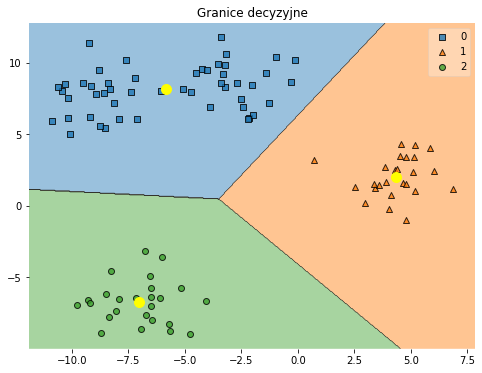

In [43]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_pred, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()